In [7]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [8]:
df = pd.read_csv("cubic_zirconia.csv") 

In [10]:
df.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [13]:
df.shape

(26967, 10)

In [18]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [20]:
df.describe(include = 'all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [21]:
df.isnull().sum()/df.isnull().sum().sum()*100

carat        0.0
cut          0.0
color        0.0
clarity      0.0
depth      100.0
table        0.0
x            0.0
y            0.0
z            0.0
price        0.0
dtype: float64

In [25]:
df.duplicated().sum()

34

In [29]:
df.drop_duplicates(inplace=True)

In [32]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [33]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




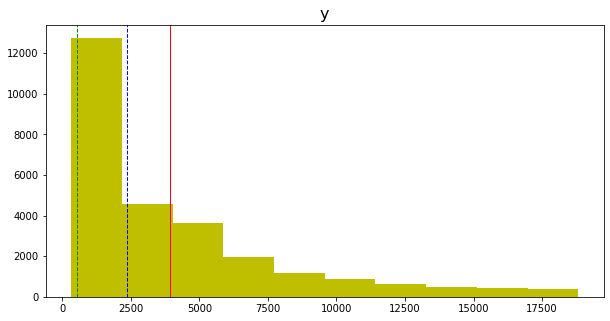

In [51]:
plt.figure(figsize=(10,5))
plt.title('y',fontsize=16)
plt.hist(df['price'], color='y') 
plt.axvline(df['price'].mean(), color='r', linewidth=1)
plt.axvline(df['price'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['price'].mode()[0], color='g', linestyle='dashed', linewidth=1)

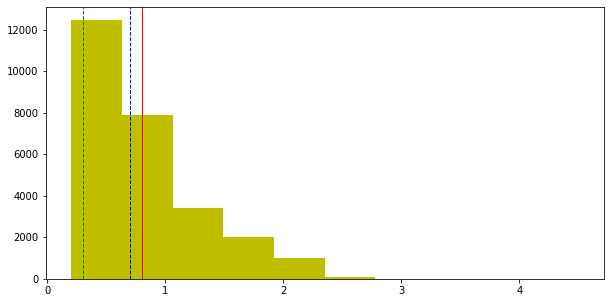

In [35]:
plt.figure(figsize=(10,5)) 
plt.hist(df['carat'], color='y') 
plt.axvline(df['carat'].mean(), color='r', linewidth=1)
plt.axvline(df['carat'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['carat'].mode()[0], color='g', linestyle='dashed', linewidth=1)

C:\Users\USER\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\USER\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


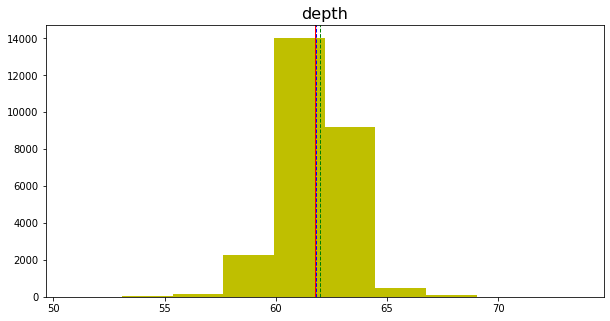

In [52]:
plt.figure(figsize=(10,5)) 
plt.title('depth',fontsize=16)
plt.hist(df['depth'], color='y') 
plt.axvline(df['depth'].mean(), color='r', linewidth=1)
plt.axvline(df['depth'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['depth'].mode()[0], color='g', linestyle='dashed', linewidth=1)

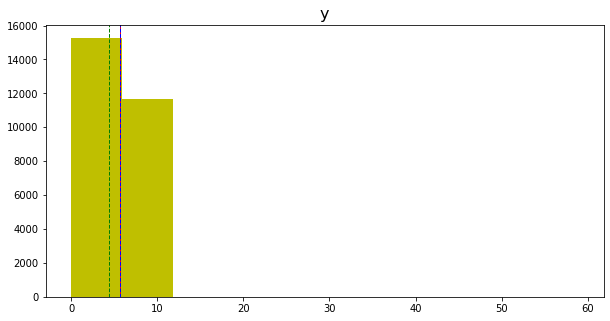

In [53]:
plt.figure(figsize=(10,5))
plt.title('y',fontsize=16)
plt.hist(df['y'], color='y') 
plt.axvline(df['y'].mean(), color='r', linewidth=1)
plt.axvline(df['y'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['y'].mode()[0], color='g', linestyle='dashed', linewidth=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010EBDAC8>,
      dtype=object)

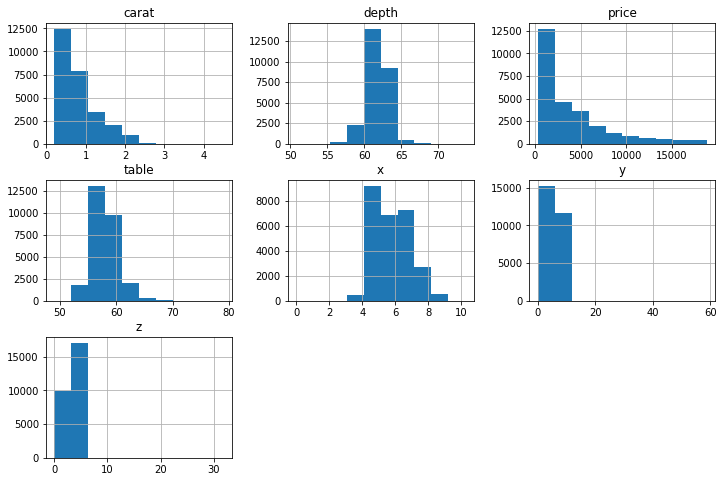

In [45]:
df.hist(figsize=(12,8))

In [47]:
df.skew()

carat    1.114789
depth   -0.026086
table    0.765805
x        0.392290
y        3.867764
z        2.580665
price    1.619116
dtype: float64

Text(0.5, 1.0, 'variable-cut')

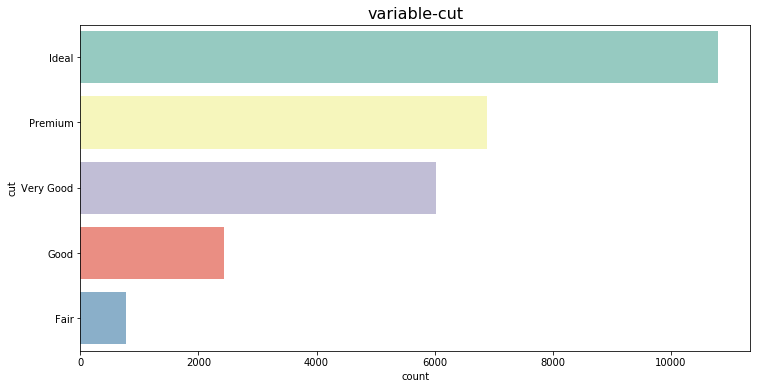

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(y=(df.cut),palette='Set3');
plt.title('variable-cut',fontsize=16)

Text(0.5, 1.0, 'variable-color')

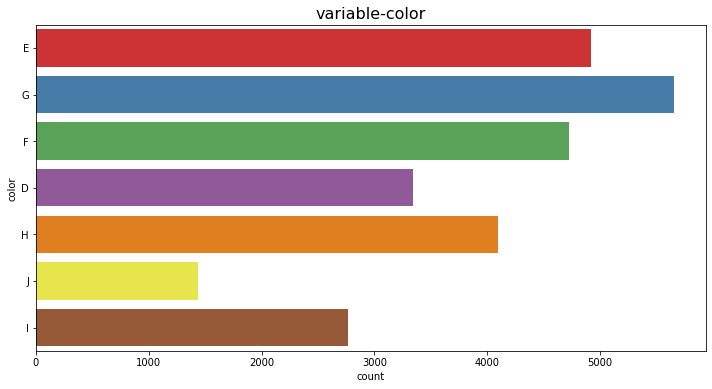

In [58]:
plt.figure(figsize=(12,6))
sns.countplot(y=(df.color),palette='Set1');
plt.title('variable-color',fontsize=16)

Text(0.5, 1.0, 'variable-clarity')

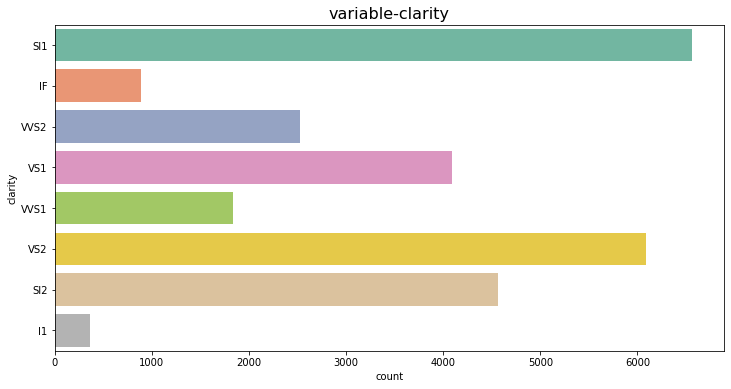

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(y=(df.clarity),palette='Set2');
plt.title('variable-clarity',fontsize=16)

In [63]:
df['depth'].isnull().sum()

697

In [66]:
median = df['depth'].median()
df['depth'] = df['depth'].fillna(median)
df['depth'].isnull().sum()

0

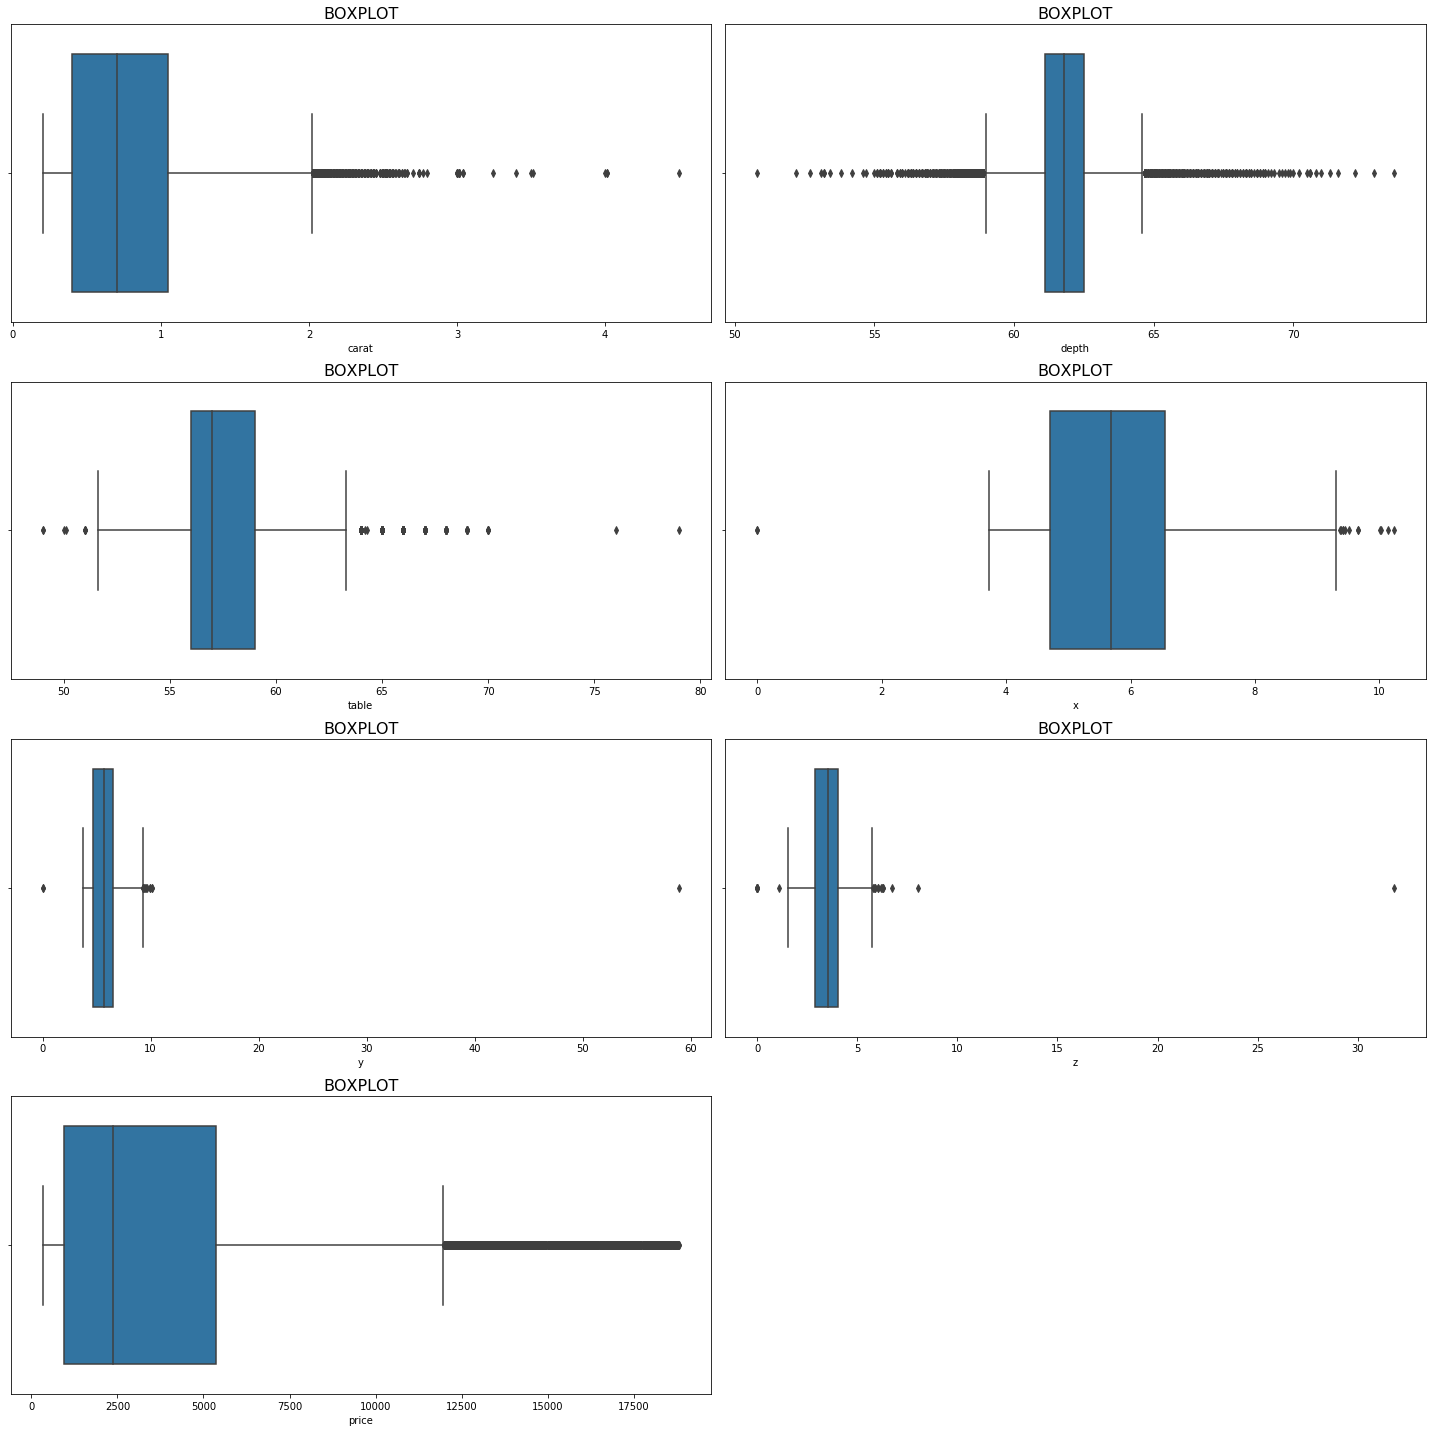

In [73]:
data_plot=df[['carat', 'depth', 'table', 'x','y','z','price']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
    plt.title('BOXPLOT',fontsize=16)


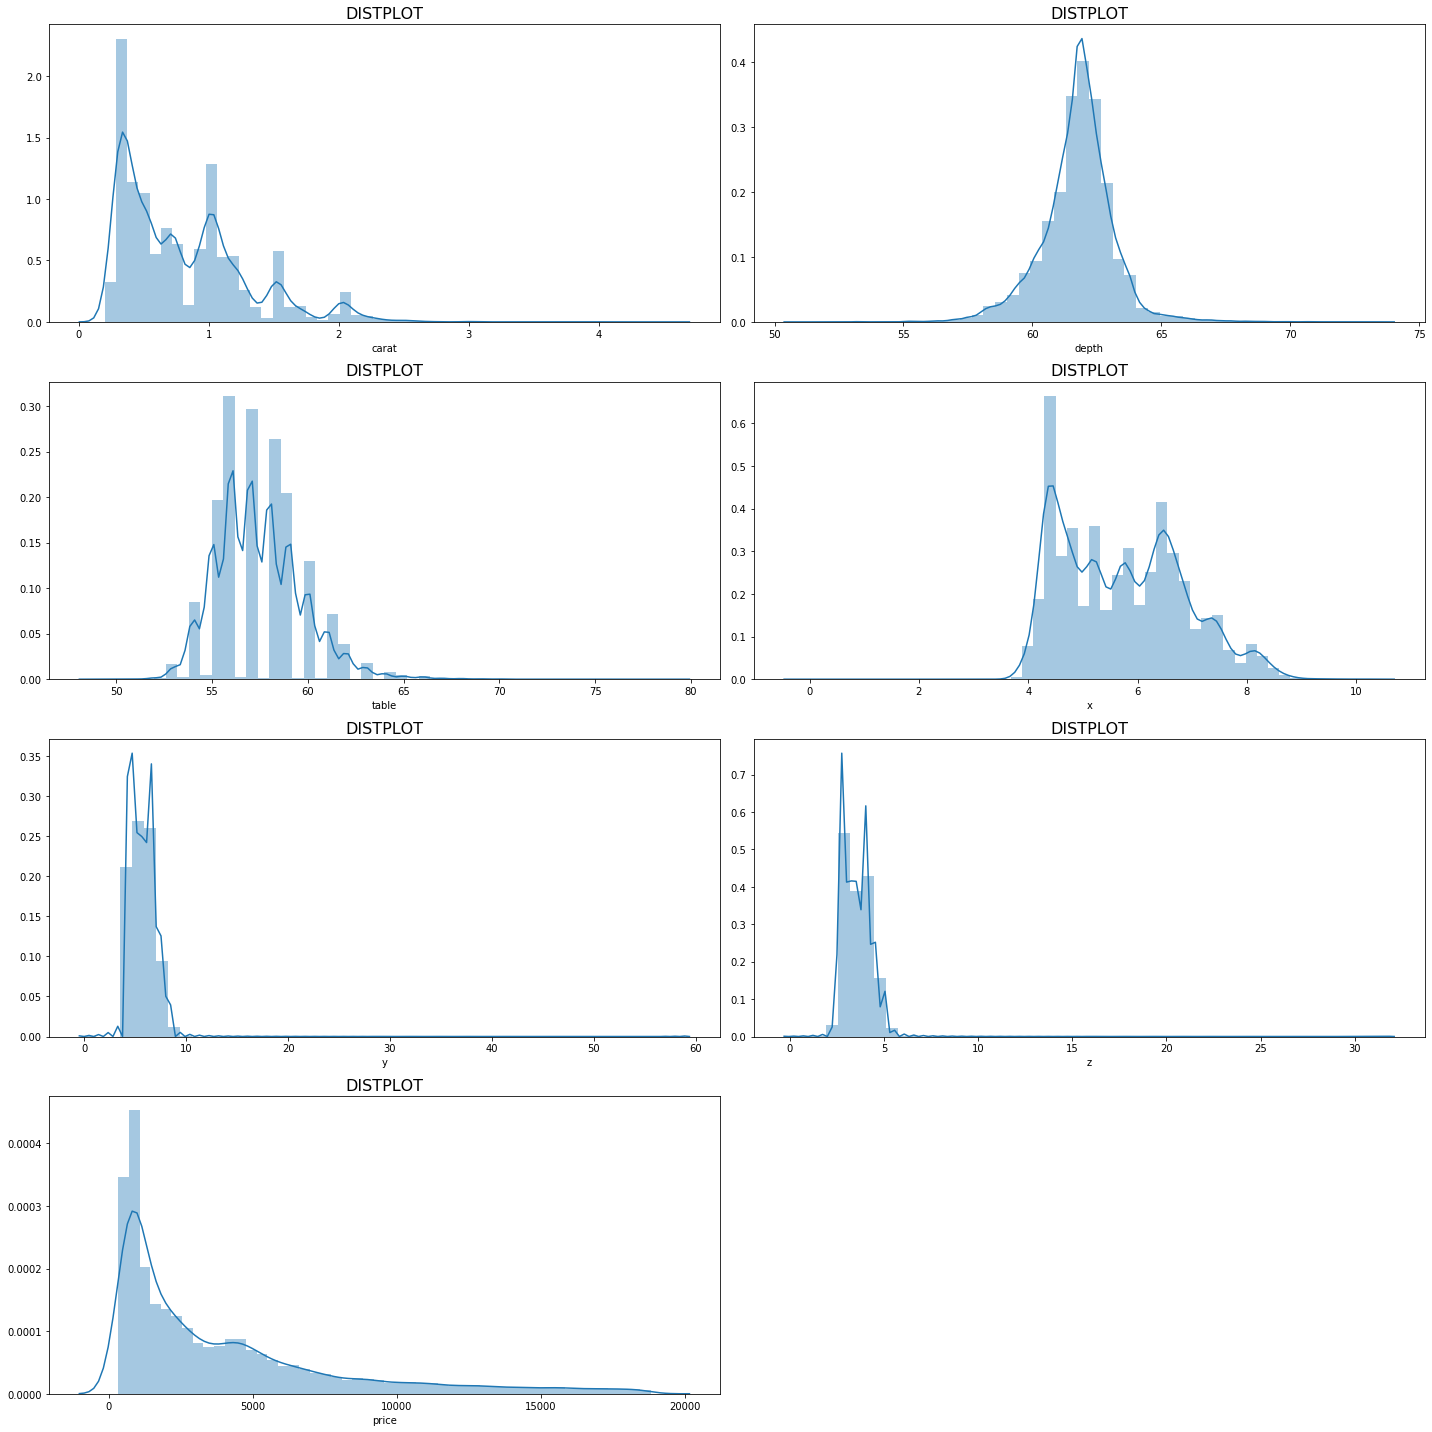

In [70]:
data_plot=df[['carat', 'depth', 'table', 'x','y','z','price']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.distplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
    plt.title('DISTPLOT',fontsize=16)

<Figure size 5760x1440 with 0 Axes>

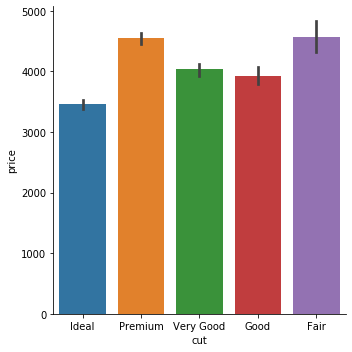

In [95]:
fig=plt.figure(figsize=(80,20))
sns.catplot(y='price', x='cut' , kind = 'bar', data = df)

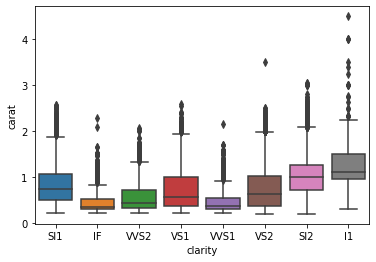

In [155]:
sns.boxplot(x="clarity", y="carat", data=df)

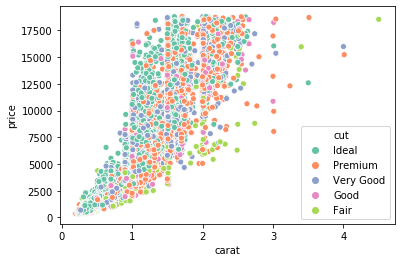

<Figure size 5760x1440 with 0 Axes>

In [158]:
sns.scatterplot(df['carat'], df['price'], hue=df['cut'],palette='Set2') 
fig=plt.figure(figsize=(80,20))

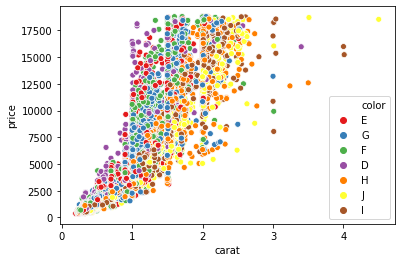

<Figure size 5760x1440 with 0 Axes>

In [159]:
sns.scatterplot(df['carat'], df['price'], hue=df['color'],palette='Set1') 
fig=plt.figure(figsize=(80,20))

In [74]:
df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.034772,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.034772,1.000000,-0.293713,-0.018120,-0.024119,0.097733,-0.002840
table,0.181539,-0.293713,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018120,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024119,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.097733,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002840,0.126844,0.886554,0.856441,0.850682,1.000000


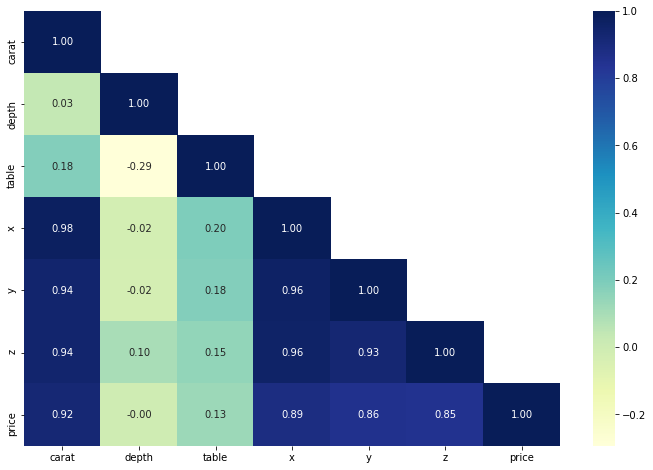

In [77]:
plt.figure(figsize=(12,8))
sns.heatmap(df.iloc[:,0:13].corr(),annot=True,fmt='.2f',cmap='YlGnBu',mask=np.triu(df.iloc[:,0:13].corr(),+1))
plt.show()

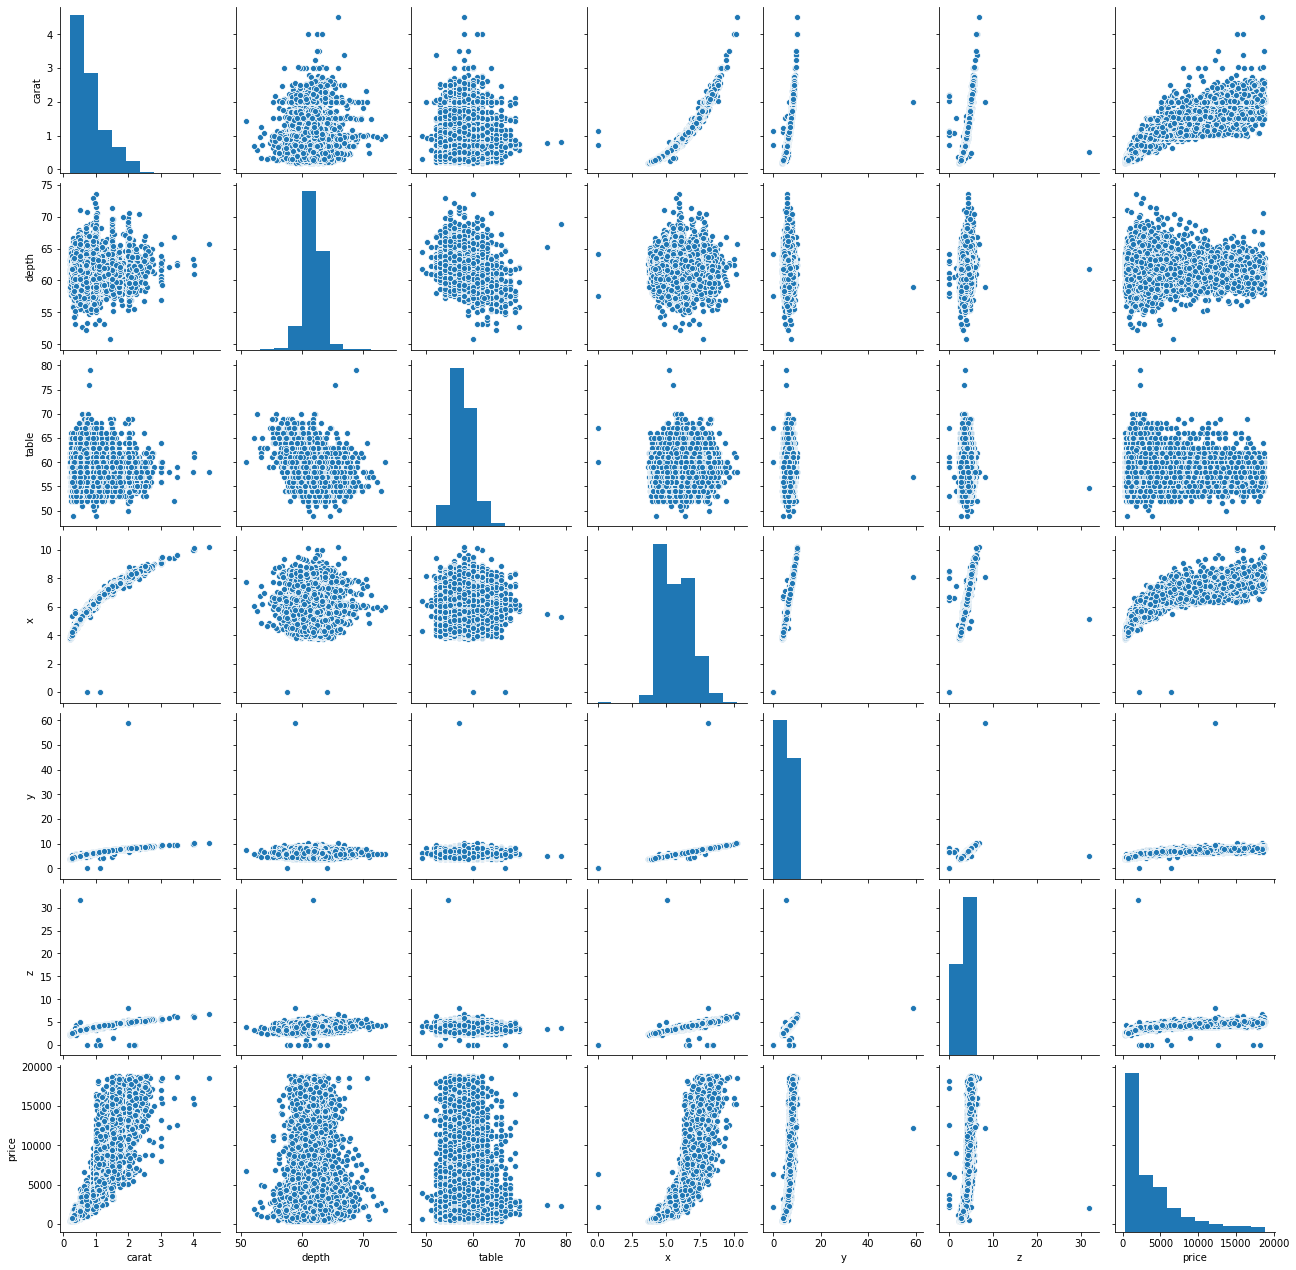

In [98]:
sns.pairplot(df)

In [106]:
data_df = df.drop('price',axis=1)

In [107]:
data_df

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65
...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60


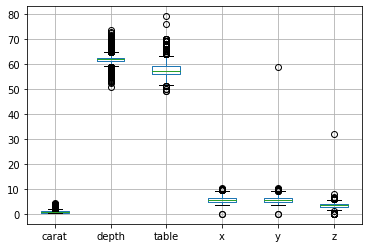

In [110]:
data_df.boxplot()

In [112]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range =  Q3 + (1.5 * IQR)
    return lower_range, upper_range 

In [113]:
lApps,uApps=remove_outlier(data_df['carat'])
data_df['carat']=np.where(data_df['carat']>uApps,uApps,data_df['carat'])
data_df['carat']=np.where(data_df['carat']<lApps,lApps,data_df['carat'])

lAccept,uAccept=remove_outlier(data_df['depth'])
data_df['depth']=np.where(data_df['depth']>uAccept,uAccept,data_df['depth'])
data_df['depth']=np.where(data_df['depth']<lAccept,lAccept,data_df['depth'])

lE,uE=remove_outlier(data_df['table'])
data_df['table']=np.where(data_df['table']>uE,uE,data_df['table'])
data_df['table']=np.where(data_df['table']<lE,lE,data_df['table'])

lT,uT=remove_outlier(data_df['x'])
data_df['x']=np.where(data_df['x']>uT,uT,data_df['x'])
data_df['x']=np.where(data_df['x']<lT,lT,data_df['x'])

lTo,uTo=remove_outlier(data_df['y'])
data_df['y']=np.where(data_df['y']>uTo,uTo,data_df['y'])
data_df['y']=np.where(data_df['y']<lTo,lTo,data_df['y'])

lfu,ufu=remove_outlier(data_df['z'])
data_df['z']=np.where(data_df['z']>ufu,ufu,data_df['z'])
data_df['z']=np.where(data_df['z']<lfu,lfu,data_df['z'])


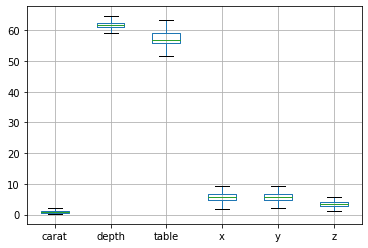

In [114]:
data_df.boxplot()

In [115]:
data_df.corr()

,carat,depth,table,x,y,z
carat,1.000000,0.029433,0.187143,0.982387,0.981464,0.977508
depth,0.029433,1.000000,-0.289357,-0.019848,-0.022884,0.095253
table,0.187143,-0.289357,1.000000,0.199061,0.193428,0.159380
x,0.982387,-0.019848,0.199061,1.000000,0.998491,0.988168
y,0.981464,-0.022884,0.193428,0.998491,1.000000,0.987841
z,0.977508,0.095253,0.159380,0.988168,0.987841,1.000000


In [121]:
data_df.describe()

,carat,cut,color,clarity,depth,table,x,y,z
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.793298,2.554895,2.605206,3.834330,61.750462,57.435544,5.729323,5.731255,3.536928
std,0.462127,1.024287,1.705883,1.725078,1.218530,2.157119,1.126175,1.118155,0.696753
min,0.200000,0.000000,0.000000,0.000000,59.000000,51.500000,1.950000,1.965000,1.190000
25%,0.400000,2.000000,1.000000,2.000000,61.100000,56.000000,4.710000,4.710000,2.900000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,5.690000,5.700000,3.520000
75%,1.050000,3.000000,4.000000,5.000000,62.500000,59.000000,6.550000,6.540000,4.040000
max,2.025000,4.000000,6.000000,7.000000,64.600000,63.500000,9.310000,9.285000,5.750000


In [116]:
data_df.select_dtypes(include='object').head()

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


In [118]:
for feature in data_df.columns: 
    if data_df[feature].dtype == 'object':
        data_df[feature] = pd.Categorical(data_df[feature]).codes

In [119]:
data_df

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65
...,...,...,...,...,...,...,...,...,...
26962,1.11,3,3,2,62.3,58.0,6.61,6.52,4.09
26963,0.33,2,4,1,61.9,55.0,4.44,4.42,2.74
26964,0.51,3,1,5,61.7,58.0,5.12,5.15,3.17
26965,0.27,4,2,7,61.8,56.0,4.19,4.20,2.60


In [120]:
data_df.dtypes

carat      float64
cut           int8
color         int8
clarity       int8
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [122]:
from scipy.stats import zscore
data_new=data_df.apply(zscore)
data_new.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.067471,-0.541748,-0.940999,-1.063351,0.286857,0.261676,-1.295847,-1.288982,-1.258616
1,-1.002552,0.434559,0.231435,-1.643046,-0.780022,0.261676,-1.162650,-1.136943,-1.201206
2,0.230898,1.410866,-0.940999,1.835122,0.368925,1.188856,0.275874,0.347673,0.348871
3,-0.807797,-0.541748,-0.354782,0.096038,-0.123481,-0.665503,-0.807459,-0.832865,-0.828039
4,-1.045831,-0.541748,-0.354782,1.255428,-1.108292,0.725266,-1.224808,-1.163774,-1.272969


In [125]:
from sklearn.datasets import load_boston
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [126]:
X = data_new
Y = df['price']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [128]:
X_con=sm.add_constant(X)

In [129]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_con, Y, test_size=0.30 , random_state=1)

# Get the value of coefficient of determination

In [131]:
print('The variation in the independent variable which is explained by the dependent variable is',round(model.rsquared*100,4),'%')

The variation in the independent variable which is explained by the dependent variable is 89.509 %


# Get the Predictions on test set

In [132]:
ypred = model.predict(X_testc)
print(ypred)

16997     6305.301299
24457     4793.389104
16612     9177.541665
308       3493.574969
26652    14812.385380
             ...     
25016      831.929123
8485      6346.473330
26891     5031.712185
17455     3880.105499
26169     4213.714389
Length: 8080, dtype: float64


# Get the RMSE on training set

In [133]:
print("The Root Mean Square Error (RMSE) of the model is for the training set is",mean_squared_error(model.fittedvalues,y_trainc,squared=False))

The Root Mean Square Error (RMSE) of the model is for the training set is 1298.6539514206925


In [134]:


math.sqrt(np.mean((model.predict(X_trainc)-y_trainc)**2))

1298.6539514206922

In [135]:
model.predict(X_trainc)

22114     186.129905
2275     1121.712249
19183     446.788566
5030     6486.262080
25414    4901.770238
            ...     
10962    -391.912726
17304    1849.048277
5193     6425.556733
12179    5024.373582
235      5982.270948
Length: 18853, dtype: float64

# Get the RMSE on test set

In [137]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,ypred)))


The Root Mean Square Error (RMSE) of the model is for testing set is 1277.4915285667225


# Using Linear Model from Sci-kit learn library

Fit the model to the training set

In [138]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

Get the score on training set

In [140]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.8950903008189984


Get the score on test set

In [141]:
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.9006355201086821


Get the RMSE on test set

In [142]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 1277.4915285667216


Check Multi-collinearity using VIF

In [143]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [144]:
i=0
for column in X.columns:
    if i < 15:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 31.592373058688235
cut ---> 1.0655058692500083
color ---> 1.1010873662525058
clarity ---> 1.068484222402078
depth ---> 2.594614622449695
table ---> 1.1820570847366483
x ---> 384.44748030346244
y ---> 369.79681088245815
z ---> 104.83681077871508


Text(0.5, 1.0, 'predicted y value vs actual y values for the test data')

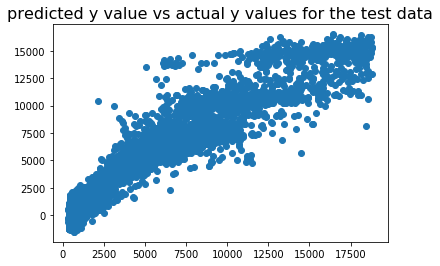

In [174]:
plt.scatter(y_test, ypred)
plt.title('predicted y value vs actual y values for the test data',fontsize=16)

In [170]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
22114,-0.980913,1.410866,0.817653,0.675733,0.533060,1.188856,-1.171530,-1.154830,-1.115091
2275,-1.067471,-0.541748,-0.940999,0.675733,-0.451751,-1.129093,-1.224808,-1.271095,-1.272969
19183,-0.634681,-0.541748,0.231435,-1.063351,0.615128,-0.201914,-0.567705,-0.609279,-0.526636
5030,0.663688,-1.518055,-0.940999,-0.483656,1.271669,-0.665503,0.710983,0.759072,0.879916
25414,0.490572,0.434559,-0.354782,-0.483656,-0.533819,2.116035,0.719863,0.678581,0.635922


In [171]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
16997,1.009920,0.434559,1.403870,-1.063351,-1.026225,2.116035,1.101694,1.063150,0.951678
24457,0.230898,1.410866,0.231435,0.675733,-2.257239,0.725266,0.551147,0.562316,0.262755
16612,1.247954,-0.541748,-0.354782,0.096038,-1.764833,-0.201914,1.376967,1.331454,1.123909
308,0.101062,-1.518055,0.231435,0.096038,1.517872,-0.201914,0.222596,0.177747,0.363223
26652,2.611242,1.410866,1.990088,0.675733,-0.780022,2.116035,2.096229,2.136366,1.999415


In [172]:
y_train.head()

22114     537
2275      844
19183    1240
5030     4065
25414    4057
Name: price, dtype: int64

In [173]:
y_test.head()

16997     5292
24457     4484
16612    11649
308       3316
26652    13043
Name: price, dtype: int64